# Mineração de Dados
**Equipe:** Evelyn Bessa, Manuela Bastos e Tiago Farias

**Assunto:** Pré-processamento, medidas de similaridade e dissimilaridade, dados ausentes, ruído e avaliação de instâncias e atributos

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean

from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

df = pd.read_csv("/content/drive/My Drive/Mineração de Dados/Churn.csv", sep=",")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,id,score,estado,genero,idade,patrimonio,saldo,produtos,possui cartao de credito,ativo,salario,saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


### Pré-processamento de dados

 - As bases de dados hoje são extremamente grandes
 - As fontes de informação não são únicas e as vezes não são padronizadas.
 - Toda base de dados está susceptível a dados ruidosos, incompletos e inconsistentes

 Por conta destes fatores devemos preparar os dados antes de efetuarmos a mineração. Dependendo da qualidade desses dados, algumas ações podem ser necessárias. Este processo de limpeza dos dados geralmente envolve filtrar, combinar e preencher valores vazios.

### **Limpeza de dados**

 - Frequentemente, os dados
são encontrados com diversas inconsistências:
registros incompletos, valores errados e dados
inconsistentes. A etapa de limpeza dos dados
visa eliminar estes problemas de modo que eles
não influam no resultado dos algoritmos usados.


##### Dados inconsistentes
 - Erros no momento da introdução dos dados

 - Erros oriundos da integração de várias bases de dados

 - Mesmo atributo com diferentes atribuições
     - Masculino/Feminino – Homem/Mulher
 - Duplicação de objetos
    - Casa - Residência

No dataset, é possível notar que inconsistência nos valores de gênero, possuindo respostas iguais com valores diferentes

In [ ]:
df["genero"].value_counts()

Masculino    521
Feminino     461
M              6
F              2
Fem            1
Name: genero, dtype: int64

In [ ]:
mapeamento_genero = {"M": "Masculino", "F": "Feminino", "Fem": "Feminino"}
df["genero"] = df["genero"].replace(mapeamento_genero)
df["genero"].value_counts()

Masculino    527
Feminino     464
Name: genero, dtype: int64

##### Dados Ausentes
1. Ignorar a descrição do indivíduo ou mesmo eliminar o descritor
2. Preencher os valores ausentes manualmente – muitas vezes
inviável
3. Usar uma constante global para representar os valores
ausentes
4. Usar a média ou a moda
Ex: usar o valor médio de renda de uma amostra
5. Usar a média ou a moda por classe
Ex: usar o valor médio de idade dos alunos do primeiro período de SI
6. Usar o valor mais provável segundo um modelo (regressão,
regra de Bayes, árvores de decisão)

In [ ]:
df.isnull().sum()

id                          0
score                       0
estado                      0
genero                      8
idade                       0
patrimonio                  0
saldo                       0
produtos                    0
possui cartao de credito    0
ativo                       0
salario                     7
saiu                        0
dtype: int64

Utilizando moda para preencher os dados

In [ ]:
moda_genero = df['genero'].mode()[0]
df["genero"] = df["genero"].fillna(moda_genero)

Usando um modelo  de regressão para prever dados

In [ ]:
variaveis_relevantes = ["patrimonio", "saldo"]

salarios_conhecidos = df.dropna(subset=["salario"])
salarios_a_prever = df[df["salario"].isnull()]

modelo = LinearRegression()
modelo.fit(salarios_conhecidos[variaveis_relevantes], salarios_conhecidos["salario"])

valores_previstos = modelo.predict(salarios_a_prever[variaveis_relevantes])

df.loc[df["salario"].isnull(), "salario"] = valores_previstos

In [ ]:
df.isnull().sum()

id                          0
score                       0
estado                      0
genero                      0
idade                       0
patrimonio                  0
saldo                       0
produtos                    0
possui cartao de credito    0
ativo                       0
salario                     0
saiu                        0
dtype: int64

##### Dados ruidosos
 - Dado ruidoso ou outlier é um erro aleatório ou uma variabilidade em uma
determinada variável.

<Axes: xlabel='idade'>

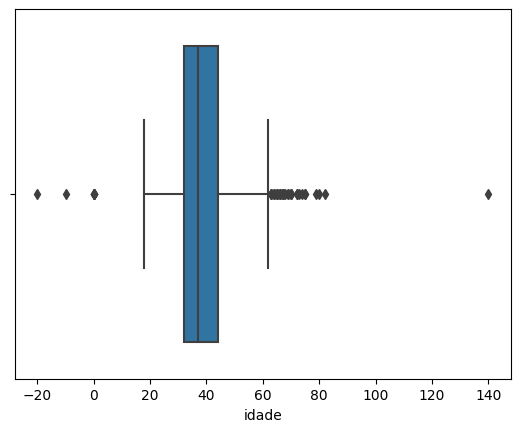

In [ ]:
sns.boxplot(x=df["idade"])

In [ ]:
df.loc[(df["idade"] <= 0) | (df["idade"] > 120)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,possui cartao de credito,ativo,salario,saiu
851,853,667,PR,Feminino,0,1,9713392,2,0,0,11331677.0,1
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
887,889,585,RS,Masculino,0,2,0,2,1,1,1865777.0,0
930,932,661,SC,Masculino,0,6,13262898,1,0,0,3881267.0,0
931,933,564,PR,Masculino,0,9,10352275,2,1,1,3433821.0,0
947,949,715,RS,Feminino,0,5,11859041,1,1,1,568417.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


39.0970970970971


<Axes: xlabel='idade'>

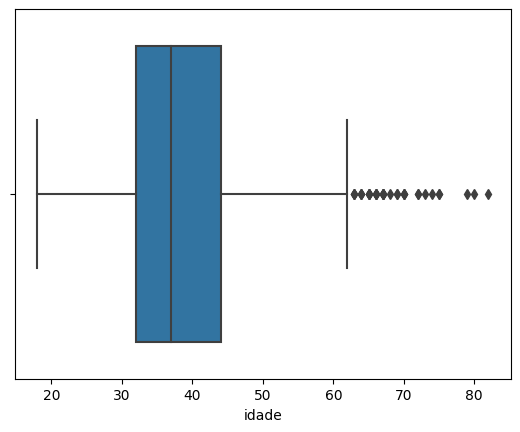

In [ ]:
media = df["idade"].mean()
df.loc[(df["idade"] <= 0) | (df["idade"] > 120), "idade"] = int(media)
print(media)
sns.boxplot(x=df["idade"])

### Integração de dados

 - É comum obter-se os dados a
serem minerados de diversas fontes: banco de dados,
arquivos textos, planilhas, data warehouses, vídeos,
imagens, entre outras. Surge então, a necessidade da
integração destes dados de forma a termos um
repositório único e consistente. Para isto, é necessária
uma análise aprofundada dos dados observando
redundâncias, dependências entre as variáveis e
valores conflitantes (categorias diferentes para os
mesmos valores, chaves divergentes, regras diferentes
para os mesmos dados, entre outros).

In [ ]:
new_df = pd.read_csv("/content/drive/My Drive/Mineração de Dados/dados.txt", sep=" ")
new_df

,id,score,estado,genero,nascimento,patrimonio,saldo,produtos,possui_cartao_de_credito,ativo,salario,saiu
0,9999,866,AM,Masculino,07/01/2003,3,0,5,1,1,200000,0


In [ ]:
print("Dataframe\n")
print(df.dtypes)
print("-="*30)
print("Novo dataframe\n")
print(new_df.dtypes)

Dataframe

id                            int64
score                         int64
estado                       object
genero                       object
idade                         int64
patrimonio                    int64
saldo                         int64
produtos                      int64
possui cartao de credito      int64
ativo                         int64
salario                     float64
saiu                          int64
dtype: object
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Novo dataframe

id                           int64
score                        int64
estado                      object
genero                      object
nascimento                  object
patrimonio                   int64
saldo                        int64
produtos                     int64
possui_cartao_de_credito     int64
ativo                        int64
salario                      int64
saiu                         int64
dtype: object


In [ ]:
# Alterando nascimento para idade
new_df['nascimento'] = pd.to_datetime(new_df['nascimento'], format='%d/%m/%Y')
ano_atual = datetime.now().year
new_df['nascimento'] = ano_atual - new_df['nascimento'].dt.year

# Alterando o tipo salario de inteiro para float
new_df['salario'] = new_df['salario'].astype(float)

# Renomeando colunas
new_df.rename(columns={"possui_cartao_de_credito": "possui cartao de credito"}, inplace=True)
new_df.rename(columns={"nascimento": "idade"}, inplace=True)

In [ ]:
print("Dataframe\n")
print(df.dtypes)
print("-="*30)
print("Novo dataframe\n")
print(new_df.dtypes)

Dataframe

id                            int64
score                         int64
estado                       object
genero                       object
idade                         int64
patrimonio                    int64
saldo                         int64
produtos                      int64
possui cartao de credito      int64
ativo                         int64
salario                     float64
saiu                          int64
dtype: object
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Novo dataframe

id                            int64
score                         int64
estado                       object
genero                       object
idade                         int64
patrimonio                    int64
saldo                         int64
produtos                      int64
possui cartao de credito      int64
ativo                         int64
salario                     float64
saiu                          int64
dtype: object


### Transformação de dados
 - A etapa de transformação dos dados
merece destaque. Alguns algoritmos trabalham apenas com
valores numéricos e outros apenas com valores categóricos.
Nestes casos, é necessário transformar os valores numéricos em
categóricos ou os categóricos em valores numéricos. Não existe
um critério único para transformação dos dados e diversas
técnicas podem ser usadas de acordo com os objetivos
pretendidos.

Algumas das técnicas empregadas nesta etapa são:

1. Suavização (remove valores errados dos dados)
2. Agrupamento (agrupa valores em faixas sumarizadas)
3. Generalização (converte valores muito específicos para valores mais genéricos)
3. Normalização(colocar as variáveis em uma mesma escala)
4. Criação de novos atributos (gerados a partir de outros já existentes)

In [ ]:
df["genero"].value_counts()

Masculino    535
Feminino     464
Name: genero, dtype: int64

In [ ]:
# Alterando a coluna genero para valores binários
df["genero"] = df["genero"].map({"Masculino": 0, "Feminino": 1})
df["genero"].value_counts()

0    535
1    464
Name: genero, dtype: int64

### Redução dos dados
 - O volume de dados usado na
mineração costuma ser alto. Em alguns casos, este
volume é tão grande que torna o processo de análise
dos dados e da própria mineração impraticável. Nestes
casos, as técnicas de redução de dados podem ser
aplicadas para que a massa de dados original seja
convertida em uma massa de dados menor, porém, sem
perder a representatividade dos dados originais. Isto
permite que os algoritmos de mineração sejam
executados com mais eficiência, mantendo a qualidade
do resultado.

In [ ]:
proporcao = df['saiu'].value_counts(normalize=True)
proporcao

0    0.796797
1    0.203203
Name: saiu, dtype: float64

In [ ]:
tamanho_final = 500

num_0s = int(tamanho_final * proporcao[0])
num_1s = tamanho_final - num_0s

amostra_0 = df[df["saiu"] == 0].sample(n=num_0s, random_state=42)
amostra_1 = df[df["saiu"] == 1].sample(n=num_1s, random_state=42)

amostra_final = pd.concat([amostra_0, amostra_1], ignore_index=True)

amostra_final

,id,score,estado,genero,idade,patrimonio,saldo,produtos,possui cartao de credito,ativo,salario,saiu
0,868,545,RS,0,38,1,8829313,2,1,1,2430295.0,0
1,981,550,RS,1,46,7,0,2,1,0,13059035.0,0
2,80,416,PR,1,41,10,12218966,2,1,0,9830161.0,0
3,672,624,PR,1,48,3,12238838,2,0,0,3002009.0,0
4,84,543,RS,1,36,3,0,2,0,0,2601959.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,786,747,PR,0,58,7,11631357,1,1,1,19069635.0,1
496,31,591,SC,1,39,3,0,3,1,0,14046938.0,1
497,140,584,SC,1,48,2,2131462,1,1,0,7516125.0,1
498,948,599,SC,1,39,4,0,1,1,0,1942732.0,1


In [ ]:
proporcao = amostra_final['saiu'].value_counts(normalize=True)
proporcao

0    0.796
1    0.204
Name: saiu, dtype: float64

### Similaridade e Dissimilaridade de dados

Similaridade:
 - Medida numérica de quão parecidos são duas instâncias de dados.
 - Valor maior quanto maior a similaridade.
 - Tipicamente no intervalo [0,1].

Dissimilaridade:
 - Medida numérica de quão diferentes são duas instâncias de dados.
 - Valor menor indica maior similaridade.
 - Zero normalmente é o valor mínimo.
 - Limite superior pode variar.

In [ ]:
import pandas as pd
from scipy.spatial.distance import cosine

# Selecionar linhas para comparação
linha1 = df.iloc[:, 0]
linha2 = df.iloc[:, 1]

# Calcular a similaridade entre as linhas
similaridade = 1 - cosine(linha1, linha2)

print(f'A similaridade entre as linhas é {similaridade:.2f}')

A similaridade entre as linhas é 0.86
